### All the packages that will be needed for natural language processing

In [3]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from spacy.lang.en import English
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import preprocessor as prepro # text prepro
import tqdm #progress bar
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora
import seaborn as sns
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()
import spacy #spacy for quick language prepro
nlp = spacy.load('en_core_web_sm') #instantiating English module

# sampling, splitting
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split


# loading ML libraries
from sklearn.pipeline import make_pipeline #pipeline creation
from sklearn.feature_extraction.text import TfidfVectorizer #transforms text to sparse matrix
from sklearn.linear_model import LogisticRegression #Logit model
from sklearn.metrics import classification_report #that's self explanatory
from sklearn.decomposition import TruncatedSVD #dimensionality reduction
from xgboost import XGBClassifier

import altair as alt #viz

#explainability
import eli5
from eli5.lime import TextExplainer

# topic modeling

from gensim.corpora.dictionary import Dictionary # Import the dictionary builder
from gensim.models import LdaMulticore # we'll use the faster multicore version of LDA

# Import pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

%matplotlib inline
pyLDAvis.enable_notebook()

In [4]:
# prepro settings
# This is prob not relevant, since it has to do with tweets? 
# prepro.set_options(prepro.OPT.URL, prepro.OPT.NUMBER, prepro.OPT.RESERVED, prepro.OPT.MENTION, prepro.OPT.SMILEY)

### Loading and appending the datasets

In [5]:
scopus2022 = pd.read_csv('scopus 2022 2021.csv',  sep = ',')
scopus = pd.read_csv('scopus.csv',  sep = ',')

In [6]:
data = scopus2022.append(scopus, ignore_index=True)

C:\Users\maart\AppData\Local\Temp\ipykernel_31424\3402760882.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = scopus2022.append(scopus, ignore_index=True)


In [7]:
data

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Yang T., Zhang X.",57907798100;56342888200;,FinTech adoption and financial inclusion: Evid...,2022,Journal of Banking and Finance,145,NaN,106668,NaN,NaN,...,NaN,JBFID,NaN,English,J. Bank. Financ.,Article,Final,NaN,Scopus,2-s2.0-85138806241
1,"Wang X., Wang Y., Zhao Y.",57193015825;57901727900;57901783600;,Financial permeation and rural poverty reducti...,2022,China Economic Review,76,NaN,101863,NaN,NaN,...,NaN,NaN,NaN,English,China Econ. Rev.,Article,Final,NaN,Scopus,2-s2.0-85138589769
2,"Dzandu M.D., Hanu C., Amegbe H.",56590001600;57201152816;57194904537;,Gamification of mobile money payment for gener...,2022,Technological Forecasting and Social Change,185,NaN,122049,NaN,NaN,...,NaN,NaN,NaN,English,Technol. Forecast. Soc. Change,Article,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-85138450268
3,"Grassi L., Fantaccini S.",57192656409;57895835500;,An overview of Fintech applications to solve t...,2022,Financial Innovation,8,1,84,NaN,NaN,...,NaN,NaN,NaN,English,Financial Innov.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85138286241
4,"DeFusco A.A., Tang H., Yannelis C.",57193852071;57890330600;55413678100;,Measuring the welfare cost of asymmetric infor...,2022,Journal of Financial Economics,146,3,NaN,821,840.0,...,NaN,JFECD,NaN,English,J. Financ. Econ.,Article,Final,NaN,Scopus,2-s2.0-85138101180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,Fayard E.H.,35072693600;,ACC pressure cleaning,2010,"Power Engineering (Barrington, Illinois)",114,5,NaN,22,NaN,...,NaN,POENA,NaN,English,Power Eng. Barrington Ill,Short Survey,Final,NaN,Scopus,2-s2.0-77953829082
3396,"Dassanayake M.M.K., Tilakarathne C.",57221353725;55762978100;,Predicting trading signals of Sri Lankan stock...,2010,"Technological Developments in Networking, Educ...",NaN,NaN,NaN,269,273,...,9789048191505,NaN,NaN,English,"Technol. Dev. Networking, Educ. Autom.",Conference Paper,Final,NaN,Scopus,2-s2.0-84878897261
3397,Hao H.-N.,36617357100;,Notice of Retraction: Short-term forecasting o...,2010,Proceedings - 2010 6th International Conferenc...,4,NaN,5584528,1838,1841,...,9781424459612,NaN,NaN,English,"Proc. - Int. Conf. Nat. Comput., ICNC",Retracted,Final,NaN,Scopus,2-s2.0-78149350510
3398,"Ma Z.-X., Zhang W.",55479146300;56621528900;,Notice of Retraction: An discrimination resear...,2010,ICAMS 2010 - Proceedings of 2010 IEEE Internat...,3,NaN,5553273,116,119,...,9781424469291,NaN,NaN,English,ICAMS - Proc. IEEE Int. Conf. Adv. Manage. Sci.,Retracted,Final,NaN,Scopus,2-s2.0-77957273781


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        3400 non-null   object 
 1   Author(s) ID                   3399 non-null   object 
 2   Title                          3400 non-null   object 
 3   Year                           3400 non-null   int64  
 4   Source title                   3400 non-null   object 
 5   Volume                         2320 non-null   object 
 6   Issue                          1426 non-null   object 
 7   Art. No.                       1051 non-null   object 
 8   Page start                     2336 non-null   object 
 9   Page end                       2326 non-null   object 
 10  Page count                     38 non-null     float64
 11  Cited by                       2164 non-null   float64
 12  DOI                            2972 non-null   o

In [9]:
data.describe(include='object')


,Authors,Author(s) ID,Title,Source title,Volume,Issue,Art. No.,Page start,Page end,DOI,...,ISSN,ISBN,CODEN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
count,3400,3399,3400,3400,2320,1426,1051,2336,2326,2972,...,2540,1174,276,3400,3396,3400,3400,1097,3400,3400
unique,3167,3156,3389,1455,495,81,1023,1013,1369,2969,...,949,821,124,4,1429,13,2,7,1,3400
top,[No author name available],[No author id available],Introduction,ACM International Conference Proceeding Series,8,1,8,1,20,10.1142/9789811235825_0003,...,21945357,9781799832591; 9781799832577,JEBUD,English,ACM Int. Conf. Proc. Ser.,Article,Final,"All Open Access, Gold",Scopus,2-s2.0-85138806241
freq,58,58,4,93,95,322,4,158,11,2,...,53,15,15,3395,93,1770,3241,278,3400,1


In [10]:
data.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'Funding Text 4',
       'Funding Text 5', 'Funding Text 6', 'Funding Text 7', 'Funding Text 8',
       'Funding Text 9', 'Funding Text 10', 'References',
       'Correspondence Address', 'Editors', 'Sponsors', 'Publisher',
       'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

### Preprocessing the data

In [11]:
data = data[['Authors', 'Author(s) ID','Title', 'Abstract','Year', 'Source title', 'Author Keywords', 'EID']]

In [12]:
data ['text'] = data['Title'] + '. ' + data['Abstract']

C:\Users\maart\AppData\Local\Temp\ipykernel_31424\4068009536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data ['text'] = data['Title'] + '. ' + data['Abstract']


In [13]:
data['EID'][0]

'2-s2.0-85138806241'

In [14]:
# from pybliometrics.scopus.utils import config
# print(config['Authentication']['APIKey'])
# config['Proxy']['ftp'] = 'socks5://localhost:8080'

In [15]:
from pybliometrics.scopus import AbstractRetrieval
ab = AbstractRetrieval('2-s2.0-85138806241', view='FULL')

ab.subject_areas


[Area(area='Finance', abbreviation='ECON', code=2003),
 Area(area='Economics and Econometrics', abbreviation='ECON', code=2002)]

In [16]:
data['EID'].dropna()

0       2-s2.0-85138806241
1       2-s2.0-85138589769
2       2-s2.0-85138450268
3       2-s2.0-85138286241
4       2-s2.0-85138101180
               ...        
3395    2-s2.0-77953829082
3396    2-s2.0-84878897261
3397    2-s2.0-78149350510
3398    2-s2.0-77957273781
3399    2-s2.0-85099426338
Name: EID, Length: 3400, dtype: object

In [17]:
list_field = []
list_det = []
for itm in range(len(data[2000:3400])):
    ab = AbstractRetrieval(data['EID'][itm], view='FULL')
    list_field.append(ab.subject_areas[0][0])
  

In [18]:
len(list_field)

1400

In [19]:
list_field1 = []
list_det1 = []
for index, row in data[:2000].iterrows():
    ab = AbstractRetrieval(row['EID'], view='FULL')
    list_field1.append(ab.subject_areas[0][0])
  


In [20]:
len(list_field1)

2000

In [21]:
list_field_all = []

In [22]:
list_field_all.extend(list_field)


In [23]:
list_field_all.extend(list_field1)


In [24]:
len(list_field_all)

3400

In [25]:
data['Categories'] = list_field_all

C:\Users\maart\AppData\Local\Temp\ipykernel_31424\2280754222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Categories'] = list_field_all


In [26]:
data.head(20)

,Authors,Author(s) ID,Title,Abstract,Year,Source title,Author Keywords,EID,text,Categories
0,"Yang T., Zhang X.",57907798100;56342888200;,FinTech adoption and financial inclusion: Evid...,This paper provides micro-level evidence on ho...,2022,Journal of Banking and Finance,Consumption; Consumption inequality; Credit co...,2-s2.0-85138806241,FinTech adoption and financial inclusion: Evid...,Finance
1,"Wang X., Wang Y., Zhao Y.",57193015825;57901727900;57901783600;,Financial permeation and rural poverty reducti...,We investigate how financial permeation affect...,2022,China Economic Review,Bank branch expansion; Financial permeation; F...,2-s2.0-85138589769,Financial permeation and rural poverty reducti...,Finance
2,"Dzandu M.D., Hanu C., Amegbe H.",56590001600;57201152816;57194904537;,Gamification of mobile money payment for gener...,This study develops and tests an integrated mo...,2022,Technological Forecasting and Social Change,Customer value; FinTech; Gamification; Marketi...,2-s2.0-85138450268,Gamification of mobile money payment for gener...,Business and International Management
3,"Grassi L., Fantaccini S.",57192656409;57895835500;,An overview of Fintech applications to solve t...,Crowdfunding is emerging as an alternative for...,2022,Financial Innovation,Crowdfunding; Fintech; Health crowdfunding; He...,2-s2.0-85138286241,An overview of Fintech applications to solve t...,Finance
4,"DeFusco A.A., Tang H., Yannelis C.",57193852071;57890330600;55413678100;,Measuring the welfare cost of asymmetric infor...,Information asymmetries are known in theory to...,2022,Journal of Financial Economics,Asymmetric information; Consumer credit; Exper...,2-s2.0-85138101180,Measuring the welfare cost of asymmetric infor...,Accounting
5,"Yin F., Jiao X., Zhou J., Yin X., Ibeke E., Iw...",57889887700;57890451800;47062334700;5788978470...,Fintech application on banking stability using...,The rapid growth and development of financial ...,2022,Journal of Cloud Computing,Banking stability; Big data; Corruption; Finte...,2-s2.0-85138019701,Fintech application on banking stability using...,Software
6,"Li Z., Yang C., Huang Z.",57193554581;57879724300;55778817500;,How does the fintech sector react to signals f...,This study analyzes how the fintech sector rea...,2022,Finance Research Letters,Capital market; Central bank digital currency;...,2-s2.0-85137739057,How does the fintech sector react to signals f...,Finance
7,"Zarifis A., Cheng X.",25825779100;55588781800;,A model of trust in Fintech and trust in Insur...,Finance and insurance are being transformed by...,2022,Journal of Behavioral and Experimental Finance,Artificial Intelligence; Finance; Fintech; Ins...,2-s2.0-85137705313,A model of trust in Fintech and trust in Insur...,Finance
8,"Metawa N., Dogan E., Taskin D.",57193643982;56088161200;57199073908;,"Analyzing the nexus of green economy, clean an...","The connection between the green economy, tech...",2022,Economic Analysis and Policy,Green economy; Sustainable finance; Technology...,2-s2.0-85137624664,"Analyzing the nexus of green economy, clean an...",Economics and Econometrics
9,"Huarng K.-H., Yu T.H.-K.",8375911500;57782612700;,Causal complexity analysis for fintech adoptio...,Financial technology (fintech) covers many inn...,2022,Journal of Business Research,fuzzy set/Qualitative Comparative Analysis (fs...,2-s2.0-85136578413,Causal complexity analysis for fintech adoptio...,Marketing


In [27]:
for index, row in data[:20].iterrows():
    ab = AbstractRetrieval(row['EID'], view='FULL')
    print(ab.subject_areas[0][0])

Finance
Finance
Business and International Management
Finance
Accounting
Software
Finance
Finance
Economics and Econometrics
Marketing
Finance
Finance
Finance
Business, Management and Accounting (miscellaneous)
Engineering (all)
Finance
Finance
Finance
Finance
Finance


In [28]:
data['Categories'].value_counts()


Finance                                             293
Business and International Management               286
Artificial Intelligence                             207
Economics, Econometrics and Finance (all)           201
Software                                            186
                                                   ... 
Pharmacology, Toxicology and Pharmaceutics (all)      1
Environmental Science (miscellaneous)                 1
Medicine (all)                                        1
Demography                                            1
Earth and Planetary Sciences (all)                    1
Name: Categories, Length: 112, dtype: int64

In [29]:
data['Categories'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3400 entries, 0 to 3399
Series name: Categories
Non-Null Count  Dtype 
--------------  ----- 
3400 non-null   object
dtypes: object(1)
memory usage: 26.7+ KB


In [30]:
data['text_clean'] = data['text'].map(lambda t: prepro.clean(t))

C:\Users\maart\AppData\Local\Temp\ipykernel_31424\2950757204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_clean'] = data['text'].map(lambda t: prepro.clean(t))


In [31]:
# run progress bar and clean up using spacy but without some heavy parts of the pipeline

clean_text = []

pbar = tqdm.tqdm(total=len(data['text_clean']),position=0, leave=True)

for text in nlp.pipe(data['text_clean'], disable=["tagger", "parser", "ner"]):

  txt = [token.lemma_.lower() for token in text 
         if token.is_alpha 
         and not token.is_stop 
         and not token.is_punct]

  clean_text.append(" ".join(txt))

  pbar.update(1)

  0%|          | 0/3400 [00:00<?, ?it/s]c:\Users\maart\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
 99%|█████████▉| 3378/3400 [00:26<00:00, 231.95it/s]

In [32]:
# write everything into one function that can be re-used later
def text_prepro(texts):
  """
  takes in a pandas series (1 column of a DF)
  removes twitter stuff
  lowercases, normalizes text
  """
  texts_clean = texts.map(lambda t: prepro.clean(t))
  clean_container = []

  pbar = tqdm.tqdm(total=len(texts_clean),position=0, leave=True)

  for text in nlp.pipe(texts_clean, disable=["tagger", "parser", "ner"]):

    txt = [token.lemma_.lower() for token in text 
          if token.is_alpha 
          and not token.is_stop 
          and not token.is_punct]

    clean_container.append(" ".join(txt))
    pbar.update(1)
  
  return clean_container

In [33]:
# apply all prepro-pipeline to texts
data['text_clean'] = text_prepro(data['text'])

100%|██████████| 3400/3400 [00:25<00:00, 133.86it/s]
C:\Users\maart\AppData\Local\Temp\ipykernel_31424\2618636742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_clean'] = text_prepro(data['text'])


In [34]:
# preprocess texts (we need tokens)
tokens = []

for summary in nlp.pipe(data['text_clean'], disable=["ner"]):
  proj_tok = [token.lemma_.lower() for token in summary 
              if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] 
              and not token.is_stop
              and not token.is_punct] 
  tokens.append(proj_tok)

In [35]:
data['tokens'] = tokens

C:\Users\maart\AppData\Local\Temp\ipykernel_31424\2173657068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens'] = tokens


In [36]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(data['tokens'])
# filter out low-frequency / high-frequency stuff, also limit the vocabulary to max 500 words, since we have a low sample size ( In the example he did, he used 1000)
dictionary.filter_extremes(no_below=50, no_above=0.5, keep_n=1000)
# construct corpus using this dictionary
corpus = [dictionary.doc2bow(doc) for doc in data['tokens']]

### Training the model

In [37]:
data.Categories.value_counts().reset_index()

,index,Categories
0,Finance,293
1,Business and International Management,286
2,Artificial Intelligence,207
3,"Economics, Econometrics and Finance (all)",201
4,Software,186
...,...,...
107,"Pharmacology, Toxicology and Pharmaceutics (all)",1
108,Environmental Science (miscellaneous),1
109,Medicine (all),1
110,Demography,1


In [38]:
data.text_clean.value_counts().reset_index()

,index,text_clean
0,fintechs impact payments abstract available,2
1,comment fintech changing japanese banking abst...,2
2,architecture blockchain based cloud banking bl...,2
3,special issue ai fintech challenge ahead abstr...,2
4,opportunities use virtual tools start fintech ...,1
...,...,...
3391,fdic new brokered deposit rule benefits bank f...,1
3392,architecture design application distributed po...,1
3393,personal data protection credit scoring indust...,1
3394,chartering fintech future charles calomiris he...,1


In [39]:
data['text_clean'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3400 entries, 0 to 3399
Series name: text_clean
Non-Null Count  Dtype 
--------------  ----- 
3400 non-null   object
dtypes: object(1)
memory usage: 26.7+ KB


In [40]:
data['Categories'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3400 entries, 0 to 3399
Series name: Categories
Non-Null Count  Dtype 
--------------  ----- 
3400 non-null   object
dtypes: object(1)
memory usage: 26.7+ KB


#### Fixing the imbalances and transforming the data into numerical values 

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le_categories = LabelEncoder()
le_text_clean = LabelEncoder()

In [44]:
data['Categories_ID'] = le_categories.fit_transform(data['Categories'])

C:\Users\maart\AppData\Local\Temp\ipykernel_31424\1575397070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Categories_ID'] = le_categories.fit_transform(data['Categories'])


In [45]:
data['text_clean_ID'] = le_text_clean.fit_transform(data['text_clean'])

C:\Users\maart\AppData\Local\Temp\ipykernel_31424\576325167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_clean_ID'] = le_text_clean.fit_transform(data['text_clean'])


In [46]:
data.Categories_ID.value_counts().reset_index()

,index,Categories_ID
0,57,293
1,20,286
2,9,207
3,44,201
4,104,186
...,...,...
107,88,1
108,56,1
109,83,1
110,38,1


In [47]:
data.text_clean_ID.value_counts().reset_index()

,index,text_clean_ID
0,1669,2
1,502,2
2,152,2
3,3030,2
4,2416,1
...,...,...
3391,1218,1
3392,153,1
3393,2497,1
3394,462,1


In [48]:
data[data['Categories_ID'] == 1]

,Authors,Author(s) ID,Title,Abstract,Year,Source title,Author Keywords,EID,text,Categories,text_clean,tokens,Categories_ID,text_clean_ID
1230,"Afzaal M.F., Rehman A., Latif S., Zafar N.A.",57516654300;37023232900;57202644682;24345723200;,Blockchain-based Automated Formal Model for Sm...,The blockchain technology is creating a great ...,2021,Proceedings of 18th International Bhurban Conf...,blockchain; formal methods; non-deterministic ...,2-s2.0-85104671046,Blockchain-based Automated Formal Model for Sm...,Aerospace Engineering,blockchain based automated formal model smart ...,"[blockchain, formal, model, smart, market, sys...",1,312
2630,"Tsai Y.-C., Chen C.-Y., Ma S.-L., Wang P.-C., ...",57211289870;35365906400;57211294444;5721130026...,FineNet: A joint convolutional and recurrent n...,Financial technology (FinTech) draws much atte...,2019,RecSys 2019 - 13th ACM Conference on Recommend...,Anomalous Financial items; CNN; Recommendation...,2-s2.0-85073330667,FineNet: A joint convolutional and recurrent n...,Aerospace Engineering,finenet joint convolutional recurrent neural n...,"[finenet, joint, convolutional, recurrent, neu...",1,1342


In [49]:
from collections import Counter
from numpy.random import RandomState
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC
SM = sm = SMOTENC(random_state=42, categorical_features=[18, 19])

In [76]:
data['text_clean_ID']

0       1355
1       1278
2       1736
3       2436
4       2245
        ... 
3395       1
3396    2564
3397    2381
3398    2380
3399     928
Name: text_clean_ID, Length: 3400, dtype: int32

In [77]:
data['Categories_ID']

0        57
1        57
2        20
3        57
4         0
       ... 
3395    104
3396    104
3397    107
3398    107
3399     90
Name: Categories_ID, Length: 3400, dtype: int32

In [50]:
# Here we use oversampling, since the distribution of the y value is skewed 
X_train_SMOTEN, y_train_SMOTEN = sm.fit_resample(data['text_clean'], data['Categories'])

ValueError: Expected 2D array, got 1D array instead:
array=['fintech adoption financial inclusion evidence household consumption china paper provides micro level evidence fintech adoption affects household consumption consumption inequality hypothesis fintech payment facilitation credit constraint alleviation higher fintech adoption households fosters financial inclusion promoting consumption financial inclusion especially increased households traditionally consumed suggests fintech reduce consumption inequality combining region level fintech adoption measures household level representative data consumption find higher fintech adoption household increases household consumption reduces consumption inequality households distance hangzhou city household located instrument variable capture exogenous variation fintech adoption yields results similar economic statistical significance addition traditional financial infrastructure prerequisite benign distributive impacts provided fintech credit demonstrates need welfare improving policies paper adds literature documenting fintech market force contributes financial inclusion elsevier'
 'financial permeation rural poverty reduction nexus insights counties china investigate financial permeation affects rural poverty reduction matching representative county household data local banking market fintech development county characteristics data china discover financial permeation bank branch expansion boosts household income mitigates household vulnerability poverty effects magnified lower income vulnerable households especially impoverished counties considering potential substitution effect fintech verify enhancing financial permeation bank branch expansion matters rural poverty reduction digital era exploring channels find financial permeation accelerates rural poverty reduction directly improving financial utilization motivating investment activities indirectly spurring local economic growth notably pronounced marginal effects channels households impoverished counties extent explain poverty reduction effect financial permeation results imply necessity financial permeation bank branch expansion realization shared prosperity elsevier'
 'gamification mobile money payment generating customer value emerging economies social impact theory perspective study develops tests integrated model social impact customer value theories understand gamification mobile money payment generate customer value social impact cross sectional data collected mobile money payment users ghana test hypotheses structural equation modelling sem study showed positive significant relationship gamified mobile money payment gmmp social impact theory constructs consequently customer value propositions gmmp found significantly positive relationship social impact constructs internalisation compliance identification compliance significantly predictive customer value constructs customer engagement satisfaction loyalty identification significantly predictive satisfaction loyalty internalisation significantly predictive customer value outcomes results gmmp create substantial social impact users generate value customer service providers mobile money ecosystem results implications technology innovations particularly potential use gamification customer touchpoints mobile money financial technology services delivery value chain authors'
 ...
 'notice retraction short term forecasting stock price based genetic neural network short term forecasting stock price paper proposes method analyzing forecasting closing price stock based genetic bp algorithm results range allowable error obtained data present model forecast short term trend stock price stock market complex nonlinear system better foreground predict stock price neural network studies paper prove neural algorithm improve speed reliability foresting method ieee'
 'notice retraction discrimination research insider trading market manipulation chinese security market based probabilistic neural network discrimination supervision insider trading market manipulation hard cover large trading data paper firstly analyses impact insider trading market manipulation security market based set discrimination model probabilistic neural network use discriminate insider trading market manipulation chinese security market result shows model set paper performs compared logistic model easier design practice discrimination accuracy apparently higher models ieee'
 'dynamical system neural network perspective karachi stock exchange study discusses evolution index returns dynamical system present application nonlinear time series analysis results estimation correlation dimension case index returns possible nonlinear analysis construct model series based feedforward neural network backpropagation training construct neural networks levenberg marquardt backpropagation found slightly better results compared arma arima models neural networks found applicable cases nonlinear time series analysis failure springer verlag'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [51]:
# Splitting the dataset into the Training set and Test set (since we have a new output variable)
X_train, X_test, y_train, y_test = train_test_split(data['text_clean'], data['Categories'], test_size = 0.2, random_state = 42)

In [52]:
#instantiate models and "bundle up as pipeline"

tfidf = TfidfVectorizer()
cls = LogisticRegression()

pipe = make_pipeline(tfidf, cls)

In [53]:
pipe.fit(X_train,y_train) # fit model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [54]:
# evaluate model performance on training set

y_eval = pipe.predict(X_train)
report = classification_report(y_train, y_eval)
print(report)

                                                              precision    recall  f1-score   support

                                                  Accounting       1.00      0.18      0.30        56
                                       Aerospace Engineering       0.00      0.00      0.00         1
                                   Agronomy and Crop Science       0.00      0.00      0.00         2
                                        Analytical Chemistry       0.00      0.00      0.00        11
                                                Anthropology       0.00      0.00      0.00         1
                                         Applied Mathematics       0.00      0.00      0.00         1
                                          Applied Psychology       0.00      0.00      0.00         4
                                                Architecture       0.00      0.00      0.00         4
                                     Artificial Intelligence       0.45      0.94

c:\Users\maart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\maart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\maart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
# evaluate model performance on test set

y_pred = pipe.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                                                       precision    recall  f1-score   support

                                           Accounting       0.00      0.00      0.00        39
                                Aerospace Engineering       0.00      0.00      0.00         1
                                             Analysis       0.00      0.00      0.00         2
                                 Analytical Chemistry       0.00      0.00      0.00         4
                                         Anthropology       0.00      0.00      0.00         1
                                   Applied Psychology       0.00      0.00      0.00         3
                                         Architecture       0.00      0.00      0.00         2
                              Artificial Intelligence       0.08      0.19      0.11        79
                            Arts and Humanities (all)       0.00      0.00      0.00         2
                  Arts and Humanities (miscellane

c:\Users\maart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\maart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\maart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
t1 = ['']

In [57]:
t1_p = text_prepro(pd.Series(t1))

100%|██████████| 1/1 [00:00<?, ?it/s]


In [58]:
pipe.predict (t1_p)

array(['Finance'], dtype=object)

### Topic modelling

In [59]:
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=5, workers = 4, passes=10)


In [60]:
# Let's try to visualize
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

c:\Users\maart\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [61]:
 # Let's Visualize
pyLDAvis.display(lda_display)

### We will use a coherence matrix to find out how many topics we need for topic modelling

In [62]:
# cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
# coherence = cm.get_coherence()  # get coherence value

In [63]:
data = data.reset_index()

In [64]:
data.shape

(3400, 15)

In [65]:
data = data[data["tokens"].str.len() != 0]

In [66]:
data

,index,Authors,Author(s) ID,Title,Abstract,Year,Source title,Author Keywords,EID,text,Categories,text_clean,tokens,Categories_ID,text_clean_ID
0,0,"Yang T., Zhang X.",57907798100;56342888200;,FinTech adoption and financial inclusion: Evid...,This paper provides micro-level evidence on ho...,2022,Journal of Banking and Finance,Consumption; Consumption inequality; Credit co...,2-s2.0-85138806241,FinTech adoption and financial inclusion: Evid...,Finance,fintech adoption financial inclusion evidence ...,"[fintech, adoption, financial, inclusion, evid...",57,1355
1,1,"Wang X., Wang Y., Zhao Y.",57193015825;57901727900;57901783600;,Financial permeation and rural poverty reducti...,We investigate how financial permeation affect...,2022,China Economic Review,Bank branch expansion; Financial permeation; F...,2-s2.0-85138589769,Financial permeation and rural poverty reducti...,Finance,financial permeation rural poverty reduction n...,"[financial, permeation, rural, poverty, reduct...",57,1278
2,2,"Dzandu M.D., Hanu C., Amegbe H.",56590001600;57201152816;57194904537;,Gamification of mobile money payment for gener...,This study develops and tests an integrated mo...,2022,Technological Forecasting and Social Change,Customer value; FinTech; Gamification; Marketi...,2-s2.0-85138450268,Gamification of mobile money payment for gener...,Business and International Management,gamification mobile money payment generating c...,"[gamification, mobile, money, payment, generat...",20,1736
3,3,"Grassi L., Fantaccini S.",57192656409;57895835500;,An overview of Fintech applications to solve t...,Crowdfunding is emerging as an alternative for...,2022,Financial Innovation,Crowdfunding; Fintech; Health crowdfunding; He...,2-s2.0-85138286241,An overview of Fintech applications to solve t...,Finance,overview fintech applications solve puzzle hea...,"[overview, fintech, application, puzzle, healt...",57,2436
4,4,"DeFusco A.A., Tang H., Yannelis C.",57193852071;57890330600;55413678100;,Measuring the welfare cost of asymmetric infor...,Information asymmetries are known in theory to...,2022,Journal of Financial Economics,Asymmetric information; Consumer credit; Exper...,2-s2.0-85138101180,Measuring the welfare cost of asymmetric infor...,Accounting,measuring welfare cost asymmetric information ...,"[welfare, cost, asymmetric, information, consu...",0,2245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,3395,Fayard E.H.,35072693600;,ACC pressure cleaning,Scheduled ACC cleaning which has become part o...,2010,"Power Engineering (Barrington, Illinois)",NaN,2-s2.0-77953829082,ACC pressure cleaning. Scheduled ACC cleaning ...,Software,acc pressure cleaning scheduled acc cleaning s...,"[acc, pressure, cleaning, acc, cleaning, saran...",104,1
3396,3396,"Dassanayake M.M.K., Tilakarathne C.",57221353725;55762978100;,Predicting trading signals of Sri Lankan stock...,This study predict the trading signals of Sri ...,2010,"Technological Developments in Networking, Educ...",NaN,2-s2.0-84878897261,Predicting trading signals of Sri Lankan stock...,Software,predicting trading signals sri lankan stock ma...,"[trading, signal, sri, lankan, stock, market, ...",104,2564
3397,3397,Hao H.-N.,36617357100;,Notice of Retraction: Short-term forecasting o...,"For short-term forecasting of stock price, thi...",2010,Proceedings - 2010 6th International Conferenc...,Genetic-neural network; Short-term forecasting...,2-s2.0-78149350510,Notice of Retraction: Short-term forecasting o...,Strategy and Management,notice retraction short term forecasting stock...,"[retraction, short, term, forecasting, stock, ...",107,2381
3398,3398,"Ma Z.-X., Zhang W.",55479146300;56621528900;,Notice of Retraction: An discrimination resear...,The discrimination and supervision of insider ...,2010,ICAMS 2010 - Proceedings of 2010 IEEE Internat...,Discrimination analysis; Insider trading; Mark...,2-s2.0-77957273781,Notice of Retraction: An discrimination resear...,Strategy and Management,notice re

In [67]:
corpus = data['tokens']

In [68]:
data.tokens.value_counts().reset_index()

,index,tokens
0,"[comment, chinese, fintech, innovation, regula...",2
1,"[comment, fintech, japanese, banking, abstract...",2
2,"[architecture, blockchain, cloud, banking, blo...",2
3,"[comment, fintech, financial, inclusion, south...",2
4,"[special, issue, fintech, challenge, ahead, ab...",2
...,...,...
3388,"[personal, datum, protection, credit, scoring,...",1
3389,"[fintech, future, charles, calomiris, henry, k...",1
3390,"[innovation, competition, payment, policy, cha...",1
3391,"[path, money, payment, system, meet, st, centu...",1


In [69]:
dirichlet_dict = corpora.Dictionary(corpus)
bow_corpus = [dirichlet_dict.doc2bow(text) for text in corpus]

# Considering 1-15 topics, as the last is cut off
num_topics = list(range(10)[1:])
num_keywords = 15

LDA_models = {}
LDA_topics = {}
for i in num_topics:
    LDA_models[i] = LdaModel(corpus=bow_corpus,
                             id2word=dirichlet_dict,
                             num_topics=i,
                             update_every=1,
                             chunksize=len(bow_corpus),
                             passes=10,
                             alpha='auto',
                             random_state=42)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

In [70]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [71]:
LDA_stability = {}
for i in range(0, len(num_topics)-1):
    jaccard_sims = []
    for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
        sims = []
        for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
            sims.append(jaccard_similarity(topic1, topic2))    
        
        jaccard_sims.append(sims)    
    
    LDA_stability[num_topics[i]] = jaccard_sims
                
mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]

In [72]:
coherences = [CoherenceModel(model=LDA_models[i], texts=corpus, dictionary=dirichlet_dict, coherence='c_v').get_coherence() for i in num_topics[:-1]]

In [73]:
num_keywords = len(coherences)

In [74]:
coh_sta_diffs = [coherences[i] - mean_stabilities[i] for i in range(num_keywords)[:-1]] # limit topic numbers to the number of keywords
coh_sta_max = max(coh_sta_diffs)
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]

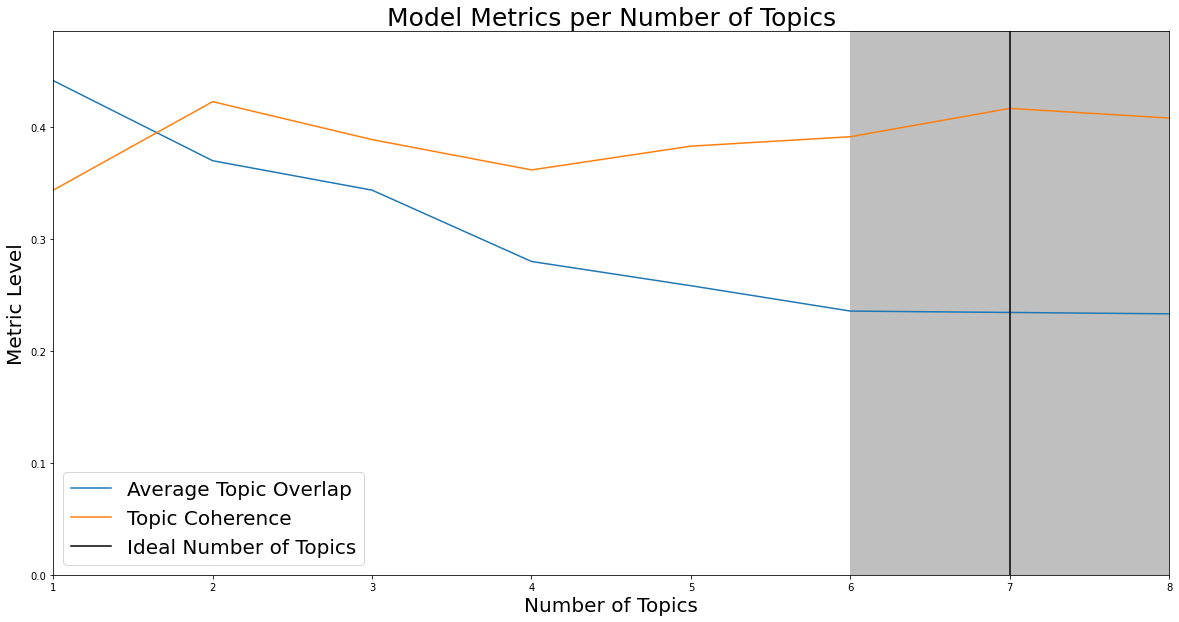

In [75]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherences, label='Topic Coherence')

ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities), max(coherences)) + (0.10 * max(max(mean_stabilities), max(coherences)))
ax.set_ylim([0, y_max])
ax.set_xlim([1, num_topics[-1]-1])
                
ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show()  